# Project 1 internship

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [70]:
#reading the datas
ds=pd.read_csv('Data file.csv')
df=pd.DataFrame(ds)

In [71]:
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [73]:
df.label.unique()

array([0, 1], dtype=int64)

In [74]:
df.pcircle.unique()

array(['UPW'], dtype=object)

In [75]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [76]:
df.shape

(209593, 37)

There are 37 columns and 209593 rows in this dataset

In [77]:
#checking NullValues
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

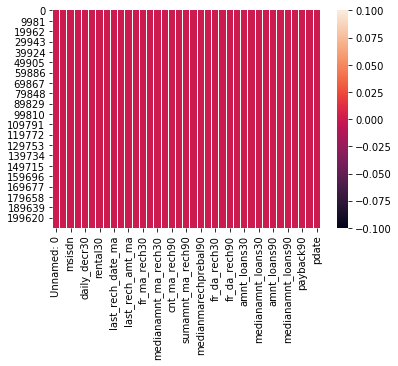

In [78]:
sns.heatmap(df.isnull())

There is no null values in this dataset

In [79]:
#Data Cleanig
#we are going to drop the iirelevent columns  from the dataset for preparing the model
df.drop(['Unnamed: 0','msisdn','pcircle','pdate'],axis=1,inplace=True)

In [80]:
df.shape

(209593, 33)

In [81]:
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count     209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        2064.452797       3.978057  ...       2.758981      17.952021   
std         2370.786034       4.256090  ...       2.554502      17.379741   
min            0.000000       0.000000  ...       0.000000       0.000000   
25%          770.000000       1.000000  ...       1.000000       6.000000   
50%         1539.000000       3.000000  ...       2.000000      12.000000   
75%         2309.000000       5.000000  ...       4.000000      24.000000   
max        55000.000000     203.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 33 columns]

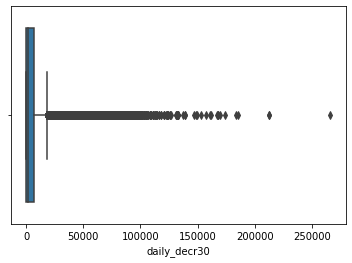

In [82]:
#Data Visualisation
sns.boxplot(df.daily_decr30)

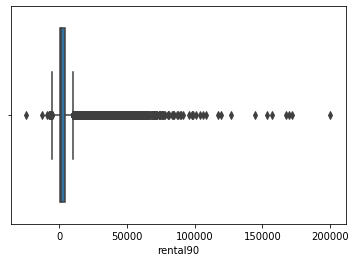

In [83]:
sns.boxplot(df.rental90)

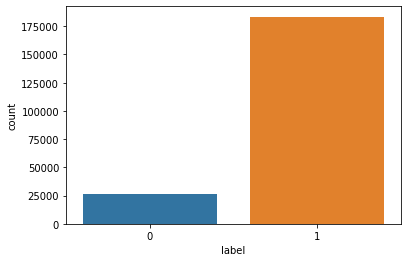

In [84]:
sns.countplot(df.label)

here we can see that the no of person who made the payment in 5 days is higher than the nonpayment 

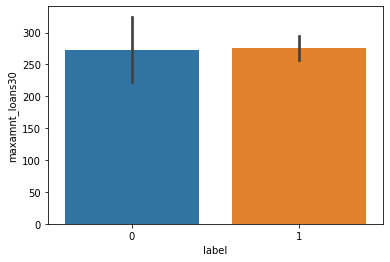

In [85]:
sns.barplot(df.label,df.maxamnt_loans30)

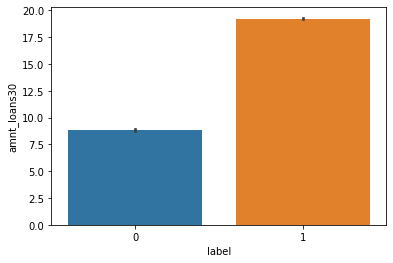

In [86]:
sns.barplot(df.label,df.amnt_loans30)

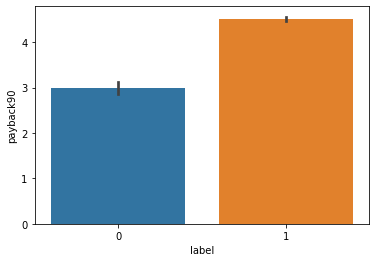

In [87]:
sns.barplot(df.label,df.payback90)

In [88]:
#Correlation
df.corr()

label       aon  daily_decr30  daily_decr90  \
label                 1.000000 -0.003785      0.168298      0.166150   
aon                  -0.003785  1.000000      0.001104      0.000374   
daily_decr30          0.168298  0.001104      1.000000      0.977704   
daily_decr90          0.166150  0.000374      0.977704      1.000000   
rental30              0.058085 -0.000960      0.442066      0.434685   
rental90              0.075521 -0.000790      0.458977      0.471730   
last_rech_date_ma     0.003728  0.001692      0.000487      0.000908   
last_rech_date_da     0.001711 -0.001693     -0.001636     -0.001886   
last_rech_amt_ma      0.131804  0.004256      0.275837      0.264131   
cnt_ma_rech30         0.237331 -0.003148      0.451385      0.426707   
fr_ma_rech30          0.001330 -0.001163     -0.000577     -0.000343   
sumamnt_ma_rech30     0.202828  0.000707      0.636536      0.603886   
medianamnt_ma_rech30  0.141490  0.004306      0.295356      0.282960   
medianmarechprebal30 -0.004829  0.003930     -0.001153     -0.000746   
cnt_ma_rech90         0.236392 -0.002725      0.587338      0.593069   
fr_ma_rech90          0.084385  0.004401     -0.078299     -0.079530   
sumamnt_ma_rech90     0.205793  0.001011      0.762981      0.768817   
medianamnt_ma_rech90  0.120855  0.004909      0.257847      0.250518   
medianmarechprebal90  0.039300 -0.000859      0.037495      0.036382   
cnt_da_rech30         0.003827  0.001564      0.000700      0.000661   
fr_da_rech30         -0.000027  0.000892     -0.001499     -0.001570   
cnt_da_rech90         0.002999  0.001121      0.038814      0.031155   
fr_da_rech90         -0.005418  0.005395      0.020673      0.016437   
cnt_loans30           0.196283 -0.001826      0.366116      0.340387   
amnt_loans30          0.197272 -0.001726      0.471492      0.447869   
maxamnt_loans30       0.000248 -0.002764     -0.000028      0.000025   
medianamnt_loans30    0.044589  0.004664     -0.011610     -0.005591   
cnt_loans90           0.004733 -0.000611      0.008962      0.009446   
amnt_loans90          0.199788 -0.002319      0.563496      0.567204   
maxamnt_loans90       0.084144 -0.001191      0.400199      0.397251   
medianamnt_loans90    0.035747  0.002771     -0.037305     -0.034686   
payback30             0.048336  0.001940      0.026915      0.019400   
payback90             0.049183  0.002203      0.047175      0.040800   

                      rental30  rental90  last_rech_date_ma  \
label                 0.058085  0.075521           0.003728   
aon                  -0.000960 -0.000790           0.001692   
daily_decr30          0.442066  0.458977           0.000487   
daily_decr90          0.434685  0.471730           0.000908   
rental30              1.000000  0.955237          -0.001095   
rental90              0.955237  1.000000          -0.001688   
last_rech_date_ma    -0.001095 -0.001688           1.000000   
last_rech_date_da     0.003261  0.002794           0.001790   
last_rech_amt_ma      0.127271  0.121416          -0.000147   
cnt_ma_rech30         0.233343  0.230260           0.004311   
fr_ma_rech30         -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30     0.272649  0.259709           0.002105   
medianamnt_ma_rech30  0.129853  0.120242          -0.001358   
medianmarechprebal30 -0.001415 -0.001237           0.004071   
cnt_ma_rech90         0.312118  0.345293           0.004263   
fr_ma_rech90         -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90     0.342306  0.360601           0.002243   
medianamnt_ma_rech90  0.110356  0.103151          -0.000726   
medianmarechprebal90  0.027170  0.029547          -0.001086   
cnt_da_rech30        -0.001105 -0.000548          -0.003467   
fr_da_rech30         -0.002558 -0.002345          -0.003626   
cnt_da_rech90         0.072255  0.056282          -0.003538   
fr_da_rech90          0.046761  0.036886          -0.002395   
cnt_loans30           0.180203  0.171595           0.001193   
a

here we can see the relation of variable with dependent variable

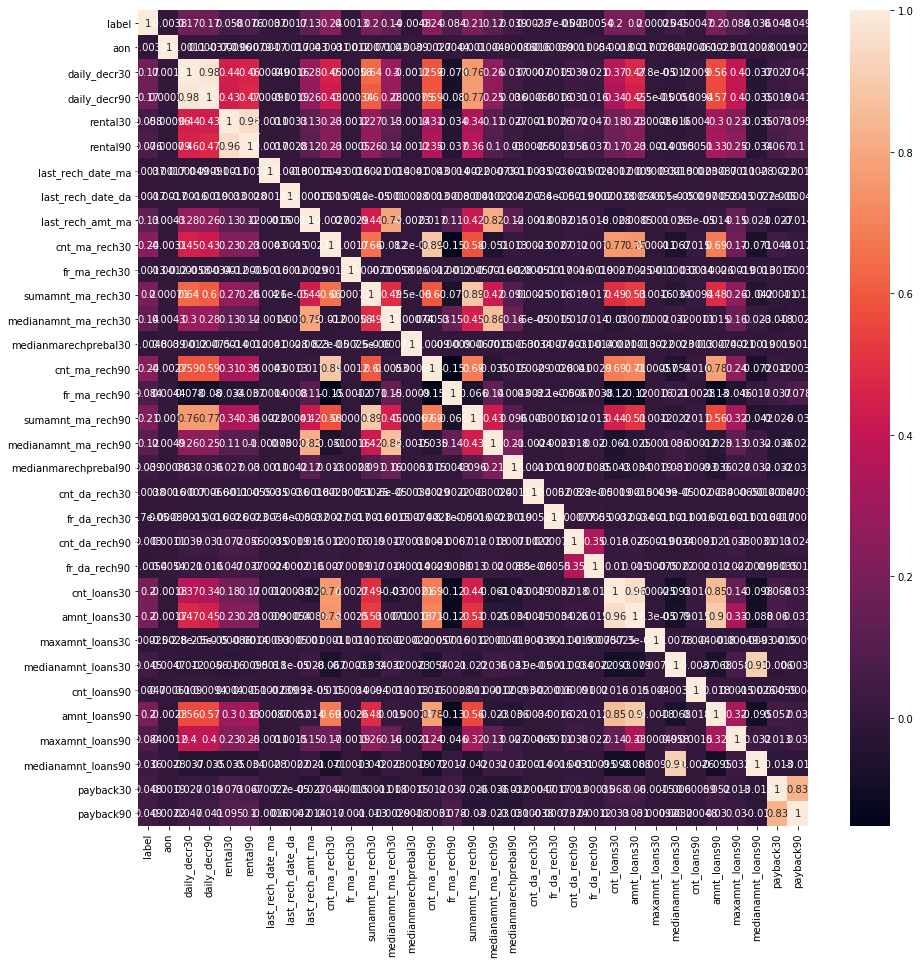

In [89]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [90]:
#Removing Outliers
from scipy.stats import zscore
outliers=np.abs(zscore(df))
print(np.where(outliers>3))
thresold=3

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([15, 15, 32, ..., 28, 26, 30], dtype=int64))


In [91]:
df_new=df[(outliers<3).all(axis=1)]

In [92]:
df_new.shape

(161465, 33)

In [93]:
df.shape

(209593, 33)

We are facing lot of data beyond outliers thresold we will use original dataframe for modeling

In [135]:
#setting x and y variable
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [136]:
x.shape

(209593, 32)

In [137]:
y.shape

(209593,)

In [138]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [139]:
#standardscale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [140]:
x.shape

(209593, 32)

There are 32 columns in the independent variable we are going to make it 12 by using PCA function for better results and better performance of the model

In [141]:
#PCA
from sklearn.decomposition import PCA
pca=PCA(12)
x=pca.fit_transform(x)

In [142]:
x.shape

(209593, 12)

In [143]:
x.shape


(209593, 12)

Now we have done with the data preprocessing and now we start to prepare the model

In this dataset the dependent variable or target variable is categorical variable so here we are going to use classification model for model prepration

# Classification Process

In [144]:
#importing necessary libraries
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score

In [147]:
def max_acc_score(clf,x,y):
    max_score=0
    for r in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        acs=accuracy_score(y_test,pred)
        if acs>max_score:
            max_score=acs
            r_state=r
            
    print('max score at the random state of',r_state,'is',max_score)


In [148]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
max_acc_score(lg,x,y)

max score at the random state of 81 is 0.8779073928290274


In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.10,random_state=81)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)

In [150]:
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

0.8794370229007633


              precision    recall  f1-score   support

           0       0.49      0.01      0.01      2526
           1       0.88      1.00      0.94     18434

    accuracy                           0.88     20960
   macro avg       0.68      0.50      0.48     20960
weighted avg       0.83      0.88      0.82     20960



[[   19  2507]
 [   20 18414]]


In [151]:
#crossvalidation
score=cross_val_score(lg,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.87492545 0.87480617 0.87463919 0.87508946 0.87489861]
0.8748717764644767
0.0001479120462034623


In [152]:
#auc_roc_score
pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresold=roc_curve(y_test,pred_prob)
print(fpr)
print('\n')
print(tpr)
print('\n')
print(thresold)

[0.         0.         0.         ... 0.99960412 1.         1.        ]


[0.00000000e+00 1.08495172e-04 9.49332755e-03 ... 9.99945752e-01
 9.99945752e-01 1.00000000e+00]


[2.         1.         0.99999678 ... 0.2596425  0.25936775 0.13732858]


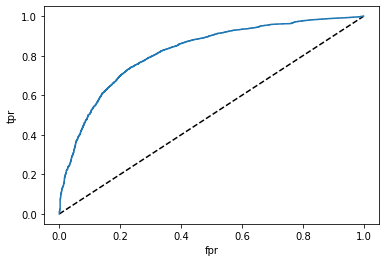

In [153]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [155]:
#auc score
roc_score=roc_auc_score(y_test,pred_prob)
roc_score

0.8204396098950002

In [156]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
max_acc_score(dt,x,y)

max score at the random state of 81 is 0.846752069467306


In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.10,random_state=81)
dt.fit(x_train,y_train)
pred=dt.predict(x_test)

In [158]:
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

0.8442270992366412


              precision    recall  f1-score   support

           0       0.37      0.41      0.39      2526
           1       0.92      0.90      0.91     18434

    accuracy                           0.84     20960
   macro avg       0.64      0.66      0.65     20960
weighted avg       0.85      0.84      0.85     20960



[[ 1032  1494]
 [ 1771 16663]]


In [159]:
#crossvalidation
score=cross_val_score(lg,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.87492545 0.87480617 0.87463919 0.87508946 0.87489861]
0.8748717764644767
0.0001479120462034623


In [160]:
#auc_roc_score
pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresold=roc_curve(y_test,pred_prob)
print(fpr)
print('\n')
print(tpr)
print('\n')
print(thresold)

[0.         0.         0.         ... 0.99960412 1.         1.        ]


[0.00000000e+00 1.08495172e-04 9.49332755e-03 ... 9.99945752e-01
 9.99945752e-01 1.00000000e+00]


[2.         1.         0.99999678 ... 0.2596425  0.25936775 0.13732858]


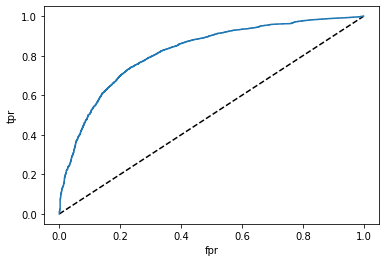

In [161]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [162]:
#auc score
roc_score=roc_auc_score(y_test,pred_prob)
roc_score

0.8204396098950002

In [163]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
pr={'n_neighbors':range(1,20)}
gs=GridSearchCV(knn,pr,cv=5)
gs.fit(x,y)
gs.best_params_

{'n_neighbors': 19}

In [164]:
knn=KNeighborsClassifier(n_neighbors=19)
max_acc_score(knn,x,y)

max score at the random state of 77 is 0.8952026527350366


In [165]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.10,random_state=77)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

In [166]:
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

0.8945610687022901


              precision    recall  f1-score   support

           0       0.64      0.34      0.45      2598
           1       0.91      0.97      0.94     18362

    accuracy                           0.89     20960
   macro avg       0.78      0.66      0.69     20960
weighted avg       0.88      0.89      0.88     20960



[[  890  1708]
 [  502 17860]]


In [167]:
score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.8915289  0.89055082 0.89069396 0.89252827 0.89259984]
0.8915803579670664
0.0008701918038193985


In [168]:
#auc_roc_score
pred_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,thresold=roc_curve(y_test,pred_prob)
print(fpr)
print('\n')
print(tpr)
print('\n')
print(thresold)

[0.         0.07159353 0.16243264 0.2417244  0.31062356 0.3791378
 0.44264819 0.50076982 0.55196305 0.60854503 0.65742879 0.72055427
 0.77636644 0.82409546 0.86489607 0.90107775 0.92571209 0.94418784
 0.96189376 0.9799846  1.        ]


[0.         0.4309988  0.6499292  0.76576626 0.83651018 0.88334604
 0.91204662 0.93404858 0.95049559 0.96334822 0.97266093 0.97952293
 0.98535018 0.99036053 0.99395491 0.9962967  0.99776713 0.99891079
 0.99940094 0.99967324 1.        ]


[2.         1.         0.94736842 0.89473684 0.84210526 0.78947368
 0.73684211 0.68421053 0.63157895 0.57894737 0.52631579 0.47368421
 0.42105263 0.36842105 0.31578947 0.26315789 0.21052632 0.15789474
 0.10526316 0.05263158 0.        ]


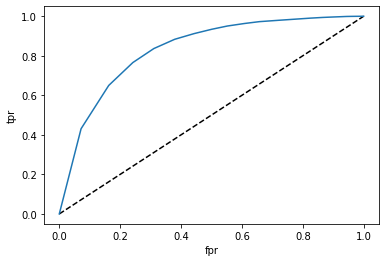

In [169]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='kneighbors classifier')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [170]:
#auc score
roc_score=roc_auc_score(y_test,pred_prob)
roc_score

0.8340048321671116

here we can see that kneighborsclassifier is performing good so we select the knn model for this problem

In [173]:
from sklearn.externals import joblib

In [174]:
joblib.dump(knn,'knn_model_micro_credit_dataset.obj')

['knn_model_micro_credit_dataset.obj']

I am using only 3 classifier and not using ensamble techiques.....There is some kind of medical emergancy in my family so i am not able to give proper time and not able to prepare ppt file.....i am really sorry for that i wll complete this after some time..